<a href="https://colab.research.google.com/github/iglitchfast/Graph/blob/main/graph_second_sample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Graph Loaded: 34 Students, 78 Interactions.


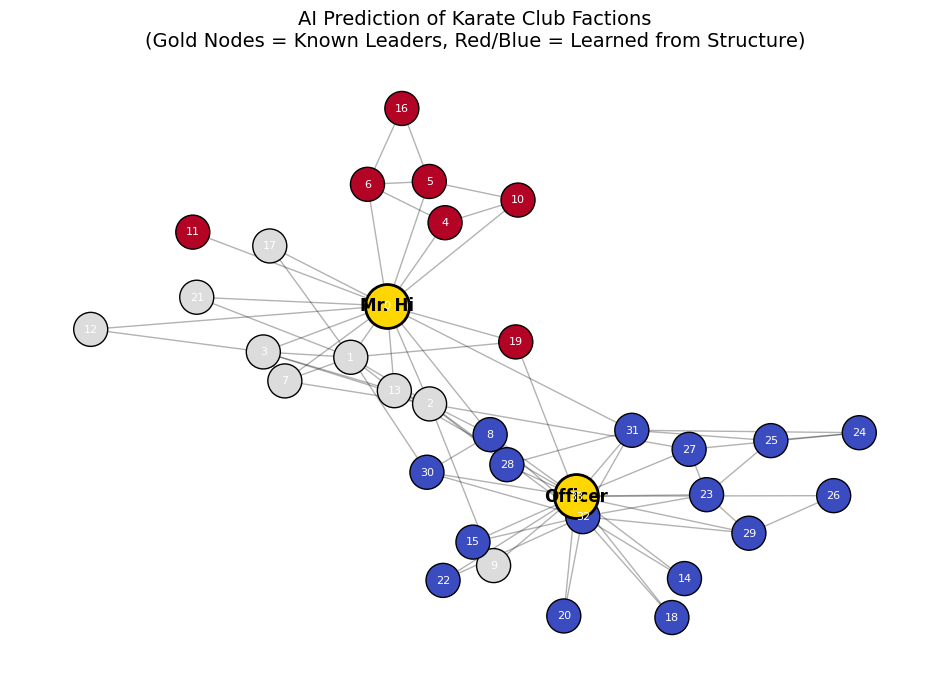

--- Prediction Analysis ---
Algorithm identified 3 distinct communities.
Note: In a perfect structural split, these match the two real-world factions.


In [10]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# ==========================================
# STEP 1: LOAD THE DATASET
# ==========================================
# Zachary's Karate Club is a built-in dataset in NetworkX
G = nx.karate_club_graph()

# The dataset comes with the "club" attribute which tells us the TRUE faction
# 'Mr. Hi' (Node 0) vs 'Officer' (Node 33)
true_labels = [G.nodes[i]['club'] for i in G.nodes()]

print(f"Graph Loaded: {G.number_of_nodes()} Students, {G.number_of_edges()} Interactions.")

# ==========================================
# STEP 2: SIMULATE "MISSING DATA" FOR AI
# ==========================================
# We will hide the labels of all students except the two leaders.
# The AI must "guess" the rest.
known_labels = {}
for node in G.nodes():
    if node == 0:
        known_labels[node] = 'Mr. Hi'  # Leader 1
    elif node == 33:
        known_labels[node] = 'Officer' # Leader 2
    else:
        # We pretend we don't know which club these students joined
        continue

# ==========================================
# STEP 3: THE "LEARNING" (Label Propagation)
# ==========================================
# This algorithm spreads the known labels to neighbors iteratively.
# It is a fundamental concept behind GNNs (Message Passing).
H = G.copy()
nx.set_node_attributes(H, known_labels, 'predicted_club')

# Use NetworkX's built-in Label Propagation (semi-supervised)
# Note: We use the community detection version here for demonstration
from networkx.algorithms import community

# Find communities purely based on structure
communities = community.greedy_modularity_communities(H)

# Map the results back to a dictionary
predicted_groups = {}
for i, comm in enumerate(communities):
    for node in comm:
        predicted_groups[node] = i

# ==========================================
# STEP 4: VISUALIZATION
# ==========================================
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42) # Fixed layout for consistency

# Prepare colors based on the PREDICTED groups
node_colors = [predicted_groups[n] for n in G.nodes()]

# Draw the Nodes
# We use a cool-warm colormap to clearly show the two factions
nodes = nx.draw_networkx_nodes(G, pos,
                               node_size=600,
                               node_color=node_colors,
                               cmap=plt.cm.coolwarm,
                               edgecolors='black')

# Draw the Edges
nx.draw_networkx_edges(G, pos, alpha=0.3)

# Highlight the Leaders (The only data we "gave" the AI)
nx.draw_networkx_nodes(G, pos, nodelist=[0, 33], node_size=1000, node_color='gold', edgecolors='black', linewidths=2)
nx.draw_networkx_labels(G, pos, labels={0: "Mr. Hi", 33: "Officer"}, font_weight="bold", font_size=12)
nx.draw_networkx_labels(G, pos, font_color='white', font_size=8)


plt.title("AI Prediction of Karate Club Factions\n(Gold Nodes = Known Leaders, Red/Blue = Learned from Structure)", fontsize=14)
plt.axis('off')
plt.show()
# ==========================================
# STEP 5: EVALUATION
# ==========================================
# Let's see if the structure-based split matches reality
print("--- Prediction Analysis ---")
print(f"Algorithm identified {len(communities)} distinct communities.")
print("Note: In a perfect structural split, these match the two real-world factions.")